# Tennis Data Analysis

## Identifying Data
- `Player`: name of the tennis player
- `Year`: year data was recorded
#### Service Game Columns (Offensive)
- `Aces`: number of serves by the player where the receiver does not touch the ball
- `DoubleFaults`: number of times player missed both first and second serve attempts
- `FirstServe`: % of first-serve attempts made
- `FirstServePointsWon`: % of first-serve attempt points won by the player
- `SecondServePointsWon`: % of second-serve attempt points won by the player
- `BreakPointsFaced`: number of times where the receiver could have won service game of the player
- `BreakPointsSaved`: % of the time the player was able to stop the receiver from winning service game when they had the chance
- `ServiceGamesPlayed`: total number of games where the player served
- `ServiceGamesWon`: total number of games where the player served and won
- `TotalServicePointsWon`: % of points in games where the player served that they won
#### Return Game Columns (Defensive)
- `FirstServeReturnPointsWon`: % of opponents first-serve points the player was able to win
- `SecondServeReturnPointsWon`: % of opponents second-serve points the player was able to win
- `BreakPointsOpportunities`: number of times where the player could have won the service game of the opponent
- `BreakPointsConverted`: % of the time the player was able to win their opponent’s service game when they had the chance
- `ReturnGamesPlayed`: total number of games where the player’s opponent served
- `ReturnGamesWon`: total number of games where the player’s opponent served and the player won
- `ReturnPointsWon`: total number of points where the player’s opponent served and the player won
- `TotalPointsWon`: % of points won by the player
#### Outcomes
- `Wins`: number of matches won in a year
- `Losses`: number of matches lost in a year
- `Winnings`: total winnings in USD($) in a year
- `Ranking`: ranking at the end of year

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load and investigate the data here:
tennis_data = pd.read_csv('tennis_stats.csv')
display(tennis_data.head())
display(tennis_data.info())
display(tennis_data.describe(include='all'))

#set searborn style
sns.set_style('darkgrid')

Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2                  0.38                10   
3                        0.33     2                  0.33                 5   
4                        0.33     1                  0.00                 2   

   ...  ReturnGamesWon  ReturnPointsWon  ServiceGamesPlayed  ServiceGamesWon  \
0  ...            0.11             0.38                   8             0.50   
1  ...            0.00             0.20                   9             0.67   
2  ...            0.16             0.34                  17             0.65   
3  ...            0.14             0.34                  15             0.80   
4  ...            0.00             0.20                   2             0.50   

   TotalPointsWon  TotalServicePointsWon  Wins  Losses  Winnings  Ranking  
0            0.43                   0.50     1       2     39820      119  
1            0.41                   0.57     0       1     17334      381  
2            0.45                   0.59     4       1    109827      119  
3            0.49                   0.63     0       0      9761      125  
4            0.35                   0.50     0       1     32879      272  

[5 rows x 24 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

None

Player         Year   FirstServe  FirstServePointsWon  \
count         1721  1721.000000  1721.000000          1721.000000   
unique         438          NaN          NaN                  NaN   
top     Ivan Dodig          NaN          NaN                  NaN   
freq             9          NaN          NaN                  NaN   
mean           NaN  2013.646717     0.598053             0.680738   
std            NaN     2.488018     0.054533             0.070422   
min            NaN  2009.000000     0.360000             0.270000   
25%            NaN  2012.000000     0.570000             0.650000   
50%            NaN  2014.000000     0.600000             0.690000   
75%            NaN  2016.000000     0.630000             0.720000   
max            NaN  2017.000000     0.880000             0.890000   

        FirstServeReturnPointsWon  SecondServePointsWon  \
count                 1721.000000           1721.000000   
unique                        NaN                   NaN   
top                           NaN                   NaN   
freq                          NaN                   NaN   
mean                     0.261673              0.479733   
std                      0.056639              0.066902   
min                      0.000000              0.060000   
25%                      0.240000              0.460000   
50%                      0.270000              0.490000   
75%                      0.290000              0.520000   
max                      0.480000              0.920000   

        SecondServeReturnPointsWon         Aces  BreakPointsConverted  \
count                  1721.000000  1721.000000           1721.000000   
unique                         NaN          NaN                   NaN   
top                            NaN          NaN                   NaN   
freq                           NaN          NaN                   NaN   
mean                      0.466432    97.105171              0.369407   
std                       0.068447   137.966077              0.162987   
min                       0.000000     0.000000              0.000000   
25%                       0.440000     7.000000              0.320000   
50%                       0.480000    34.000000              0.380000   
75%                       0.500000   140.000000              0.430000   
max                       0.750000  1185.000000              1.000000   

        BreakPointsFaced  ...  ReturnGamesWon  ReturnPointsWon  \
count        1721.000000  ...     1721.000000      1721.000000   
unique               NaN  ...             NaN              NaN   
top                  NaN  ...             NaN              NaN   
freq                 NaN  ...             NaN              NaN   
mean          112.003486  ...        0.173823         0.342208   
std           119.247651  ...        0.080880         0.049369   
min             1.000000  ...        0.000000         0.000000   
25%            15.000000  ...        0.130000         0.320000   
50%            55.000000  ...        0.180000         0.350000   
75%           201.000000  ...        0.220000         0.370000   
max           507.000000  ...        0.560000         0.510000   

        ServiceGamesPlayed  ServiceGamesWon  TotalPointsWon  \
count          1721.000000      1721.000000     1721.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean            197.650203         0.715590        0.473155   
std             221.208703         0.123287        0.037139   
min               0.000000         0.000000        0.220000   
25%              22.000000         0.670000        0.460000   
50%              86.000000         0.750000        0.480000   
75%             348.000000         0.790000        0.500000   
max             916.000000         1.000000        0.820000   

        TotalServicePointsWon         Wins     

In [2]:
# Create a correlation matrix
corr = tennis_data.drop('Player', axis=1).corr()
display(corr)
plt.show()

Year  FirstServe  FirstServePointsWon  \
Year                        1.000000    0.051406            -0.016728   
FirstServe                  0.051406    1.000000            -0.070659   
FirstServePointsWon        -0.016728   -0.070659             1.000000   
FirstServeReturnPointsWon  -0.106784    0.025488             0.021729   
SecondServePointsWon        0.005300    0.101417             0.320765   
SecondServeReturnPointsWon -0.039087   -0.001924            -0.004724   
Aces                       -0.108367    0.048149             0.460323   
BreakPointsConverted       -0.072404   -0.018877            -0.041538   
BreakPointsFaced           -0.101735    0.057709             0.301925   
BreakPointsOpportunities   -0.114806    0.062345             0.324853   
BreakPointsSaved           -0.006154    0.087945             0.405751   
DoubleFaults               -0.071885   -0.005477             0.373321   
ReturnGamesPlayed          -0.108405    0.071776             0.375465   
ReturnGamesWon             -0.073256   -0.010676            -0.010193   
ReturnPointsWon            -0.078229    0.004189            -0.002793   
ServiceGamesPlayed         -0.108477    0.071920             0.376460   
ServiceGamesWon            -0.008930    0.137473             0.817829   
TotalPointsWon             -0.041790    0.148349             0.648753   
TotalServicePointsWon      -0.005544    0.180996             0.860033   
Wins                       -0.108235    0.064832             0.356702   
Losses                     -0.077181    0.053736             0.330581   
Winnings                    0.043908    0.057882             0.361121   
Ranking                    -0.040483   -0.068759            -0.150004   

                            FirstServeReturnPointsWon  SecondServePointsWon  \
Year                                        -0.106784              0.005300   
FirstServe                                   0.025488              0.101417   
FirstServePointsWon                          0.021729              0.320765   
FirstServeReturnPointsWon                    1.000000              0.072707   
SecondServePointsWon                         0.072707              1.000000   
SecondServeReturnPointsWon                   0.301265              0.103584   
Aces                                         0.140165              0.266269   
BreakPointsConverted                         0.324057              0.052755   
BreakPointsFaced                             0.295724              0.258691   
BreakPointsOpportunities                     0.313338              0.277782   
BreakPointsSaved                             0.048347              0.340147   
DoubleFaults                                 0.244592              0.235941   
ReturnGamesPlayed                            0.261871              0.296480   
ReturnGamesWon                               0.757435              0.096622   
ReturnPointsWon                              0.834267              0.095585   
ServiceGamesPlayed                           0.261206              0.296809   
ServiceGamesWon                              0.091319              0.650764   
TotalPointsWon                               0.496682              0.622673   
TotalServicePointsWon                        0.052335              0.713076   
Wins                                         0.256029              0.268979   
Losses                                       0.243278              0.250918   
Winnings                                     0.240808              0.281215   
Ranking                                     -0.178664             -0.181013   

                            SecondServeReturnPointsWon      Aces  \
Year                                         -0.039087 -0.108367   
FirstServe                                   -0.001924  0.048149   
FirstServePointsWon                          -0.004724  0.460323   
FirstServeReturnPointsWon                     0.301265  0.140165   
SecondServePointsWon                      

Player  Year   Aces  DoubleFaults  FirstServe  \
0     Adam Pavlasek  2016   36.0          20.0        0.60   
1     Adam Pavlasek  2017   45.0          23.0        0.59   
2  Adrian Mannarino  2009   22.0          16.0        0.53   
3  Adrian Mannarino  2010   40.0          17.0        0.60   
4  Adrian Mannarino  2011  131.0         105.0        0.60   

   FirstServePointsWon  SecondServePointsWon  BreakPointsFaced  \
0                 0.71                  0.50              49.0   
1                 0.67                  0.40              58.0   
2                 0.62                  0.38              51.0   
3                 0.68                  0.48              52.0   
4                 0.67                  0.49             306.0   

   BreakPointsSaved  ServiceGamesPlayed  ServiceGamesWon  \
0              0.65                81.0             0.79   
1              0.48                78.0             0.62   
2              0.53                47.0             0.49   
3              0.56                83.0             0.72   
4              0.54               482.0             0.71   

   TotalServicePointsWon  Wins  Losses  Winnings  Ranking  
0                   0.62   3.0     3.0  171484.0    210.0  
1                   0.56   1.0     5.0  182241.0    210.0  
2                   0.50   0.0     4.0  103695.0     26.0  
3                   0.60   2.0     4.0  144932.0     26.0  
4                   0.60  17.0    23.0  336492.0     26.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player                 1719 non-null   object 
 1   Year                   1719 non-null   int64  
 2   Aces                   1719 non-null   float64
 3   DoubleFaults           1719 non-null   float64
 4   FirstServe             1719 non-null   float64
 5   FirstServePointsWon    1719 non-null   float64
 6   SecondServePointsWon   1719 non-null   float64
 7   BreakPointsFaced       1719 non-null   float64
 8   BreakPointsSaved       1719 non-null   float64
 9   ServiceGamesPlayed     1719 non-null   float64
 10  ServiceGamesWon        1719 non-null   float64
 11  TotalServicePointsWon  1719 non-null   float64
 12  Wins                   1719 non-null   float64
 13  Losses                 1719 non-null   float64
 14  Winnings               1719 non-null   float64
 15  Rank

None

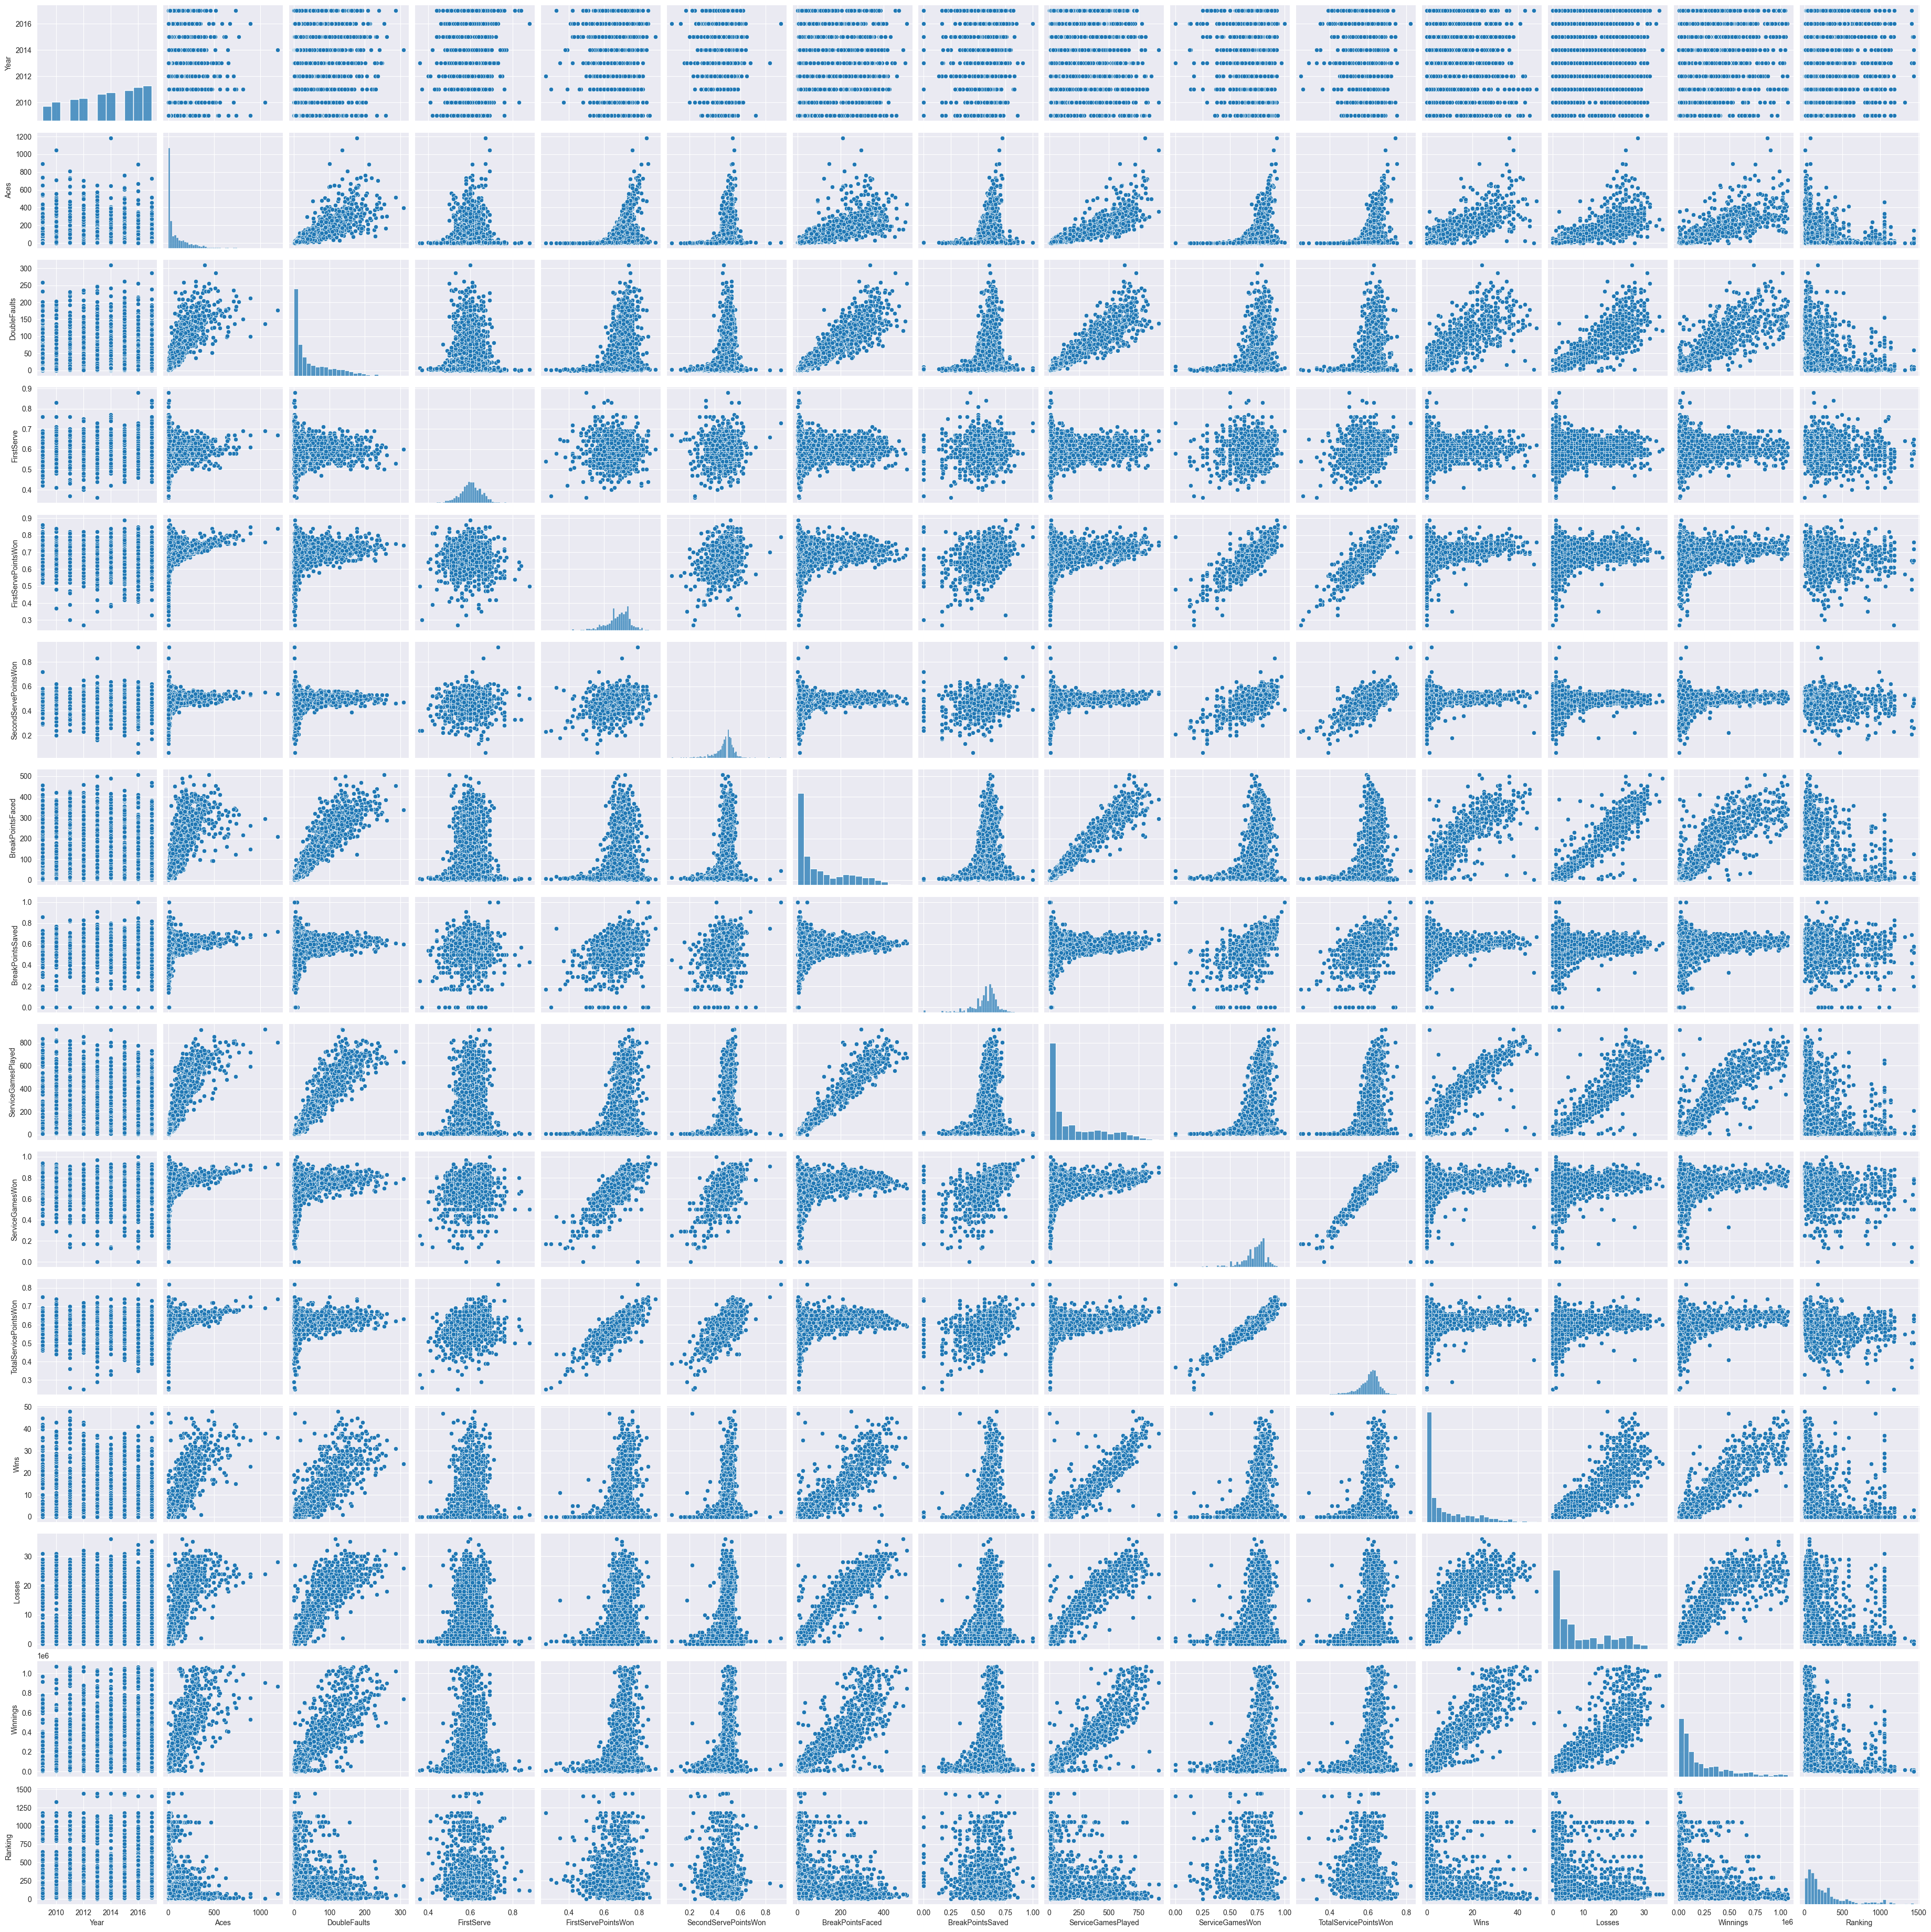

<Figure size 640x480 with 0 Axes>

In [3]:
# perform exploratory analysis here:
# offensive dataframe
tennis_offensive = tennis_data[['Player', 'Year','Aces', 'DoubleFaults','FirstServe',
                                'FirstServePointsWon','SecondServePointsWon',
                                'BreakPointsFaced','BreakPointsSaved',
                                'ServiceGamesPlayed','ServiceGamesWon',
                                'TotalServicePointsWon',
                                'Wins', 'Losses',
                                'Winnings','Ranking'
                                ]].groupby(['Player', 'Year']).mean().reset_index()
display(tennis_offensive.head())
display(tennis_offensive.info())
sns.pairplot(tennis_offensive)
plt.show()
plt.clf()

Player  Year  FirstServeReturnPointsWon  \
0     Adam Pavlasek  2016                       0.32   
1     Adam Pavlasek  2017                       0.30   
2  Adrian Mannarino  2009                       0.24   
3  Adrian Mannarino  2010                       0.25   
4  Adrian Mannarino  2011                       0.28   

   SecondServeReturnPointsWon  BreakPointsOpportunities  BreakPointsConverted  \
0                        0.44                        36                  0.47   
1                        0.41                        32                  0.47   
2                        0.39                        15                  0.27   
3                        0.50                        37                  0.35   
4                        0.48                       246                  0.40   

   ReturnGamesPlayed  ReturnGamesWon  ReturnPointsWon  TotalPointsWon  Wins  \
0                 79            0.22             0.36            0.50     3   
1                 77            0.19             0.34            0.46     1   
2                 46            0.09             0.30            0.40     0   
3                 86            0.15             0.33            0.47     2   
4                481            0.21             0.36            0.48    17   

   Losses  Winnings  Ranking  
0       3    171484      210  
1       5    182241      210  
2       4    103695       26  
3       4    144932       26  
4      23    336492       26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1719 non-null   object 
 1   Year                        1719 non-null   int64  
 2   FirstServeReturnPointsWon   1719 non-null   float64
 3   SecondServeReturnPointsWon  1719 non-null   float64
 4   BreakPointsOpportunities    1719 non-null   int64  
 5   BreakPointsConverted        1719 non-null   float64
 6   ReturnGamesPlayed           1719 non-null   int64  
 7   ReturnGamesWon              1719 non-null   float64
 8   ReturnPointsWon             1719 non-null   float64
 9   TotalPointsWon              1719 non-null   float64
 10  Wins                        1719 non-null   int64  
 11  Losses                      1719 non-null   int64  
 12  Winnings                    1719 non-null   int64  
 13  Ranking                     1719 

None

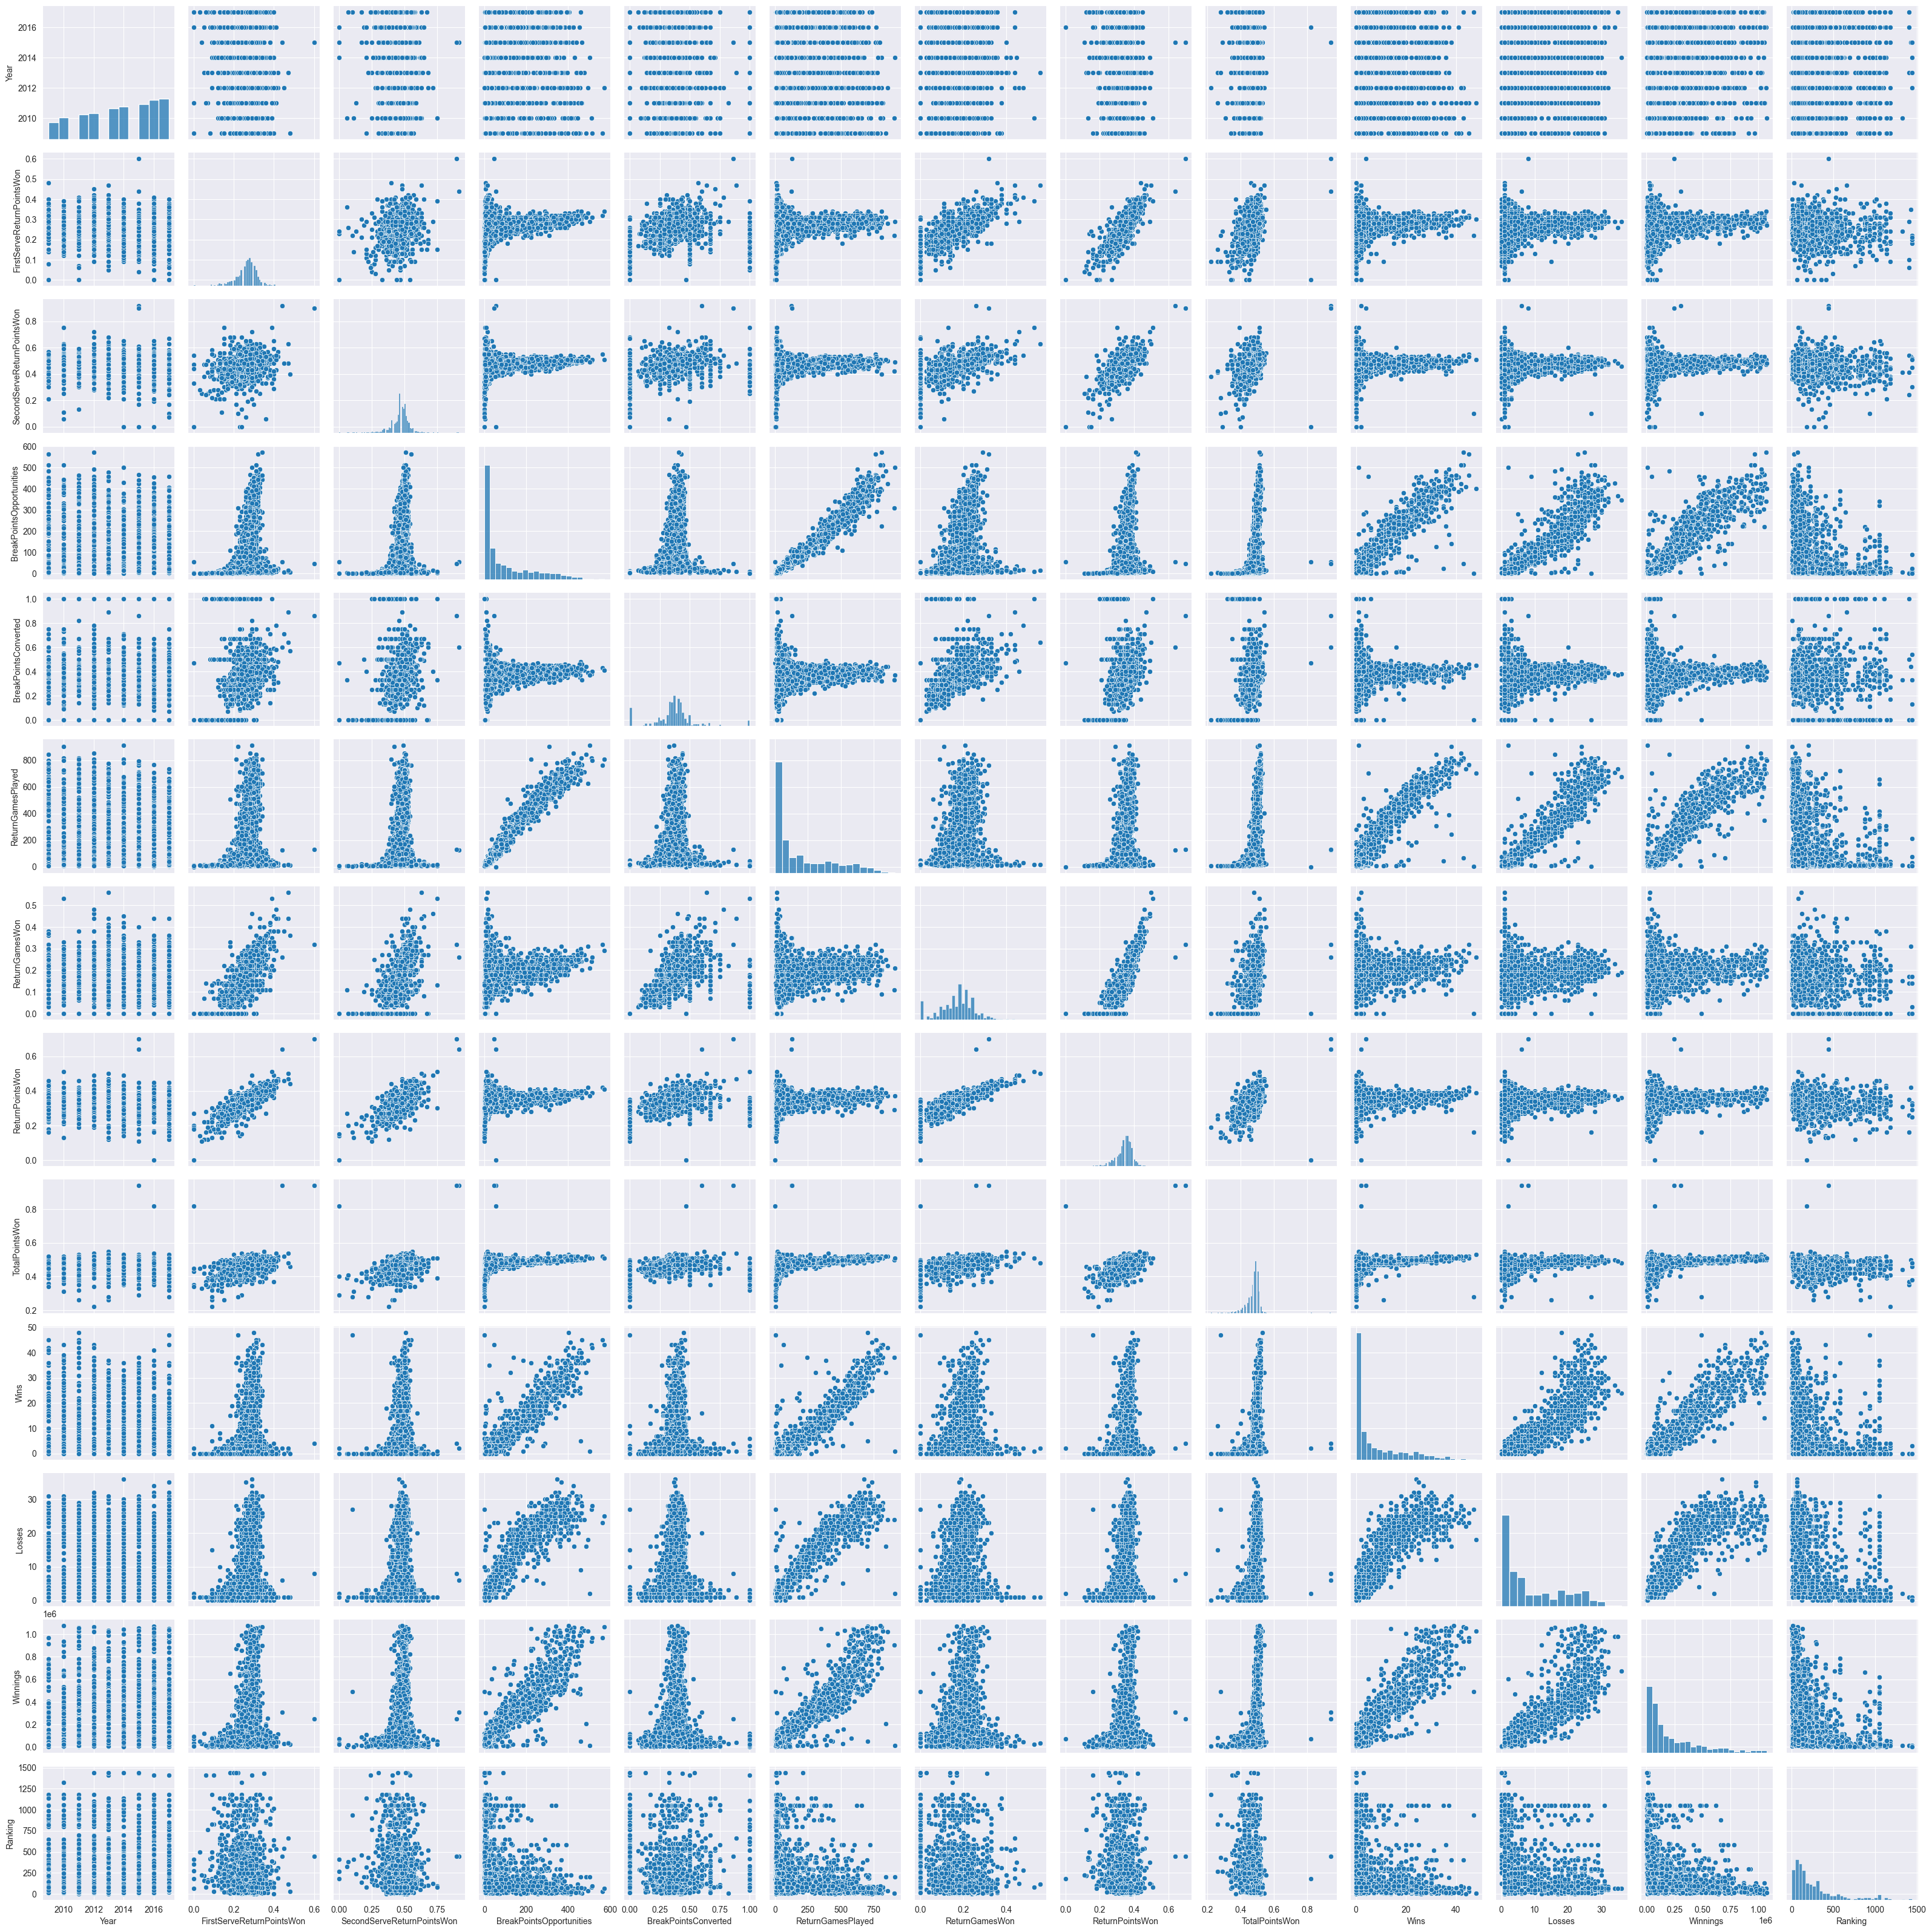

In [4]:
# defensive dataframe
tennis_defensive = tennis_data[['Player','Year','FirstServeReturnPointsWon', 'SecondServeReturnPointsWon',
                                'BreakPointsOpportunities','BreakPointsConverted',
                                'ReturnGamesPlayed','ReturnGamesWon',
                                'ReturnPointsWon','TotalPointsWon',
                                'Wins', 'Losses',
                                'Winnings','Ranking'
                                ]].groupby(['Player','Year']).sum().reset_index()
display(tennis_defensive.head())
display(tennis_defensive.info())
sns.pairplot(tennis_defensive)
plt.show()

## Create Models that take 1 feature

### Creating a Model for Predicting Wings Based on the Aces 

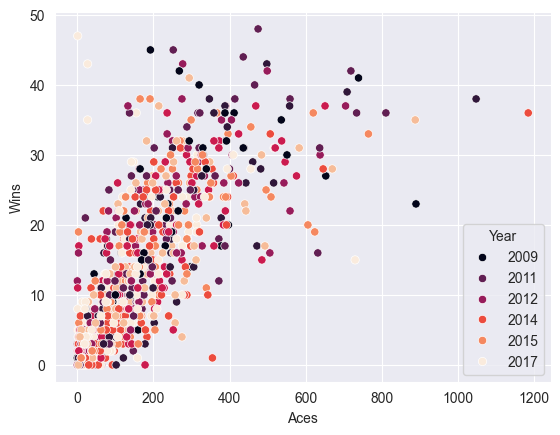

0.683386994229285
[0.06033631]
1.9914075336243915


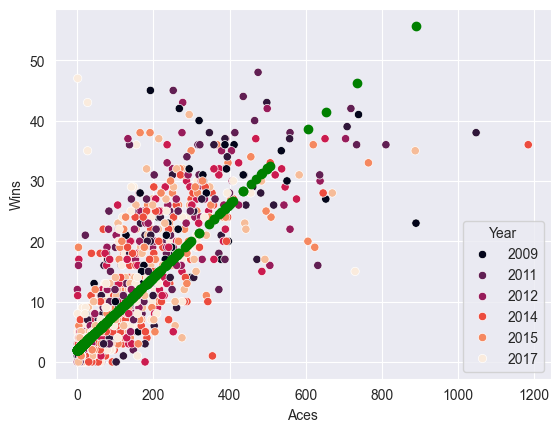

In [5]:
# Select one feature to perform linear regression
# Scatter plot of Aces vs Wins
sns.scatterplot(data=tennis_offensive, x='Aces', y='Wins', hue='Year', palette='rocket')
plt.show()
# Create Aces & Wins Variables
Aces_x = tennis_offensive['Aces']
Winnings_y = tennis_offensive['Wins']
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(Aces_x, Winnings_y, train_size=0.8, test_size=0.2)
# Create and train the model
LinReg_Aces = LinearRegression()
# Fit the model
# reshape is used to convert the data into a 2D array
Wins_fit = LinReg_Aces.fit(x_train.values.reshape(-1,1), y_train)

# print the score and the coefficients
print(LinReg_Aces.score(x_test.values.reshape(-1,1), y_test))
print(LinReg_Aces.coef_)
print(LinReg_Aces.intercept_)

# plot the model
Wins_Pred = LinReg_Aces.predict(x_test.values.reshape(-1,1))
sns.scatterplot(data=tennis_offensive, x='Aces', y='Wins', hue='Year', palette='rocket')
plt.scatter(x_test, Wins_Pred, color='green')
plt.show()

### Creating a Model for predicting the Break Points Opportunities

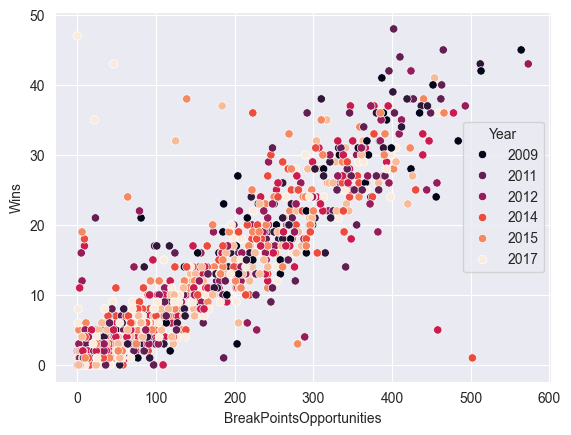

0.849614234119446
[0.07707543]
-0.008876837663598813


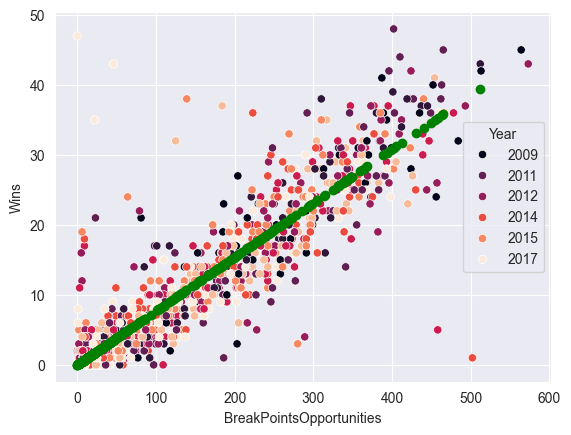

In [6]:
# Select one feature to perform linear regression
# Scatter plot of BreakPointsOpportunities vs Wins
sns.scatterplot(data=tennis_defensive, x='BreakPointsOpportunities', y='Wins', hue='Year', palette='rocket')
plt.show()
# Create Aces & Wins Variables
BPOport_x = tennis_defensive['BreakPointsOpportunities']
BPWins_y = tennis_defensive['Wins']
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(BPOport_x, BPWins_y, train_size=0.8, test_size=0.2)
# Create and train the model
LinReg_BPOpor = LinearRegression()
# Fit the model
# reshape is used to convert the data into a 2D array
Wins_fit = LinReg_Aces.fit(x_train.values.reshape(-1,1), y_train)

# print the score and the coefficients
print(LinReg_Aces.score(x_test.values.reshape(-1,1), y_test))
print(LinReg_Aces.coef_)
print(LinReg_Aces.intercept_)

# plot the model
Wins_Pred = LinReg_Aces.predict(x_test.values.reshape(-1,1))
sns.scatterplot(data=tennis_defensive, x='BreakPointsOpportunities', y='Wins', hue='Year', palette='rocket')
plt.scatter(x_test, Wins_Pred, color='green')
plt.show()

### Create a model for predicting the Winnings based on the Wins

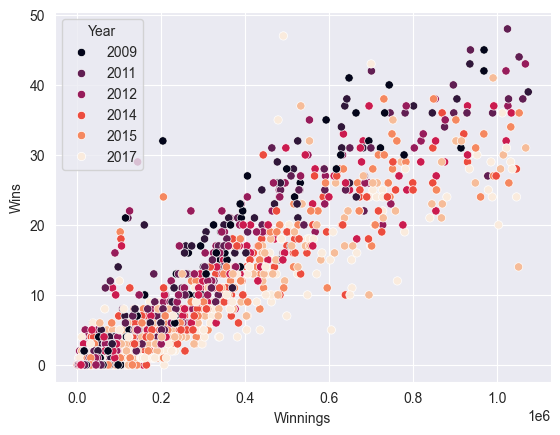

0.8317897025499696
[3.68998099e-05]
-0.7264025700249883


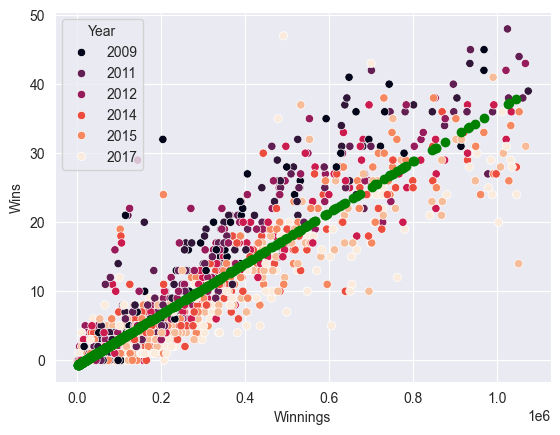

In [7]:
# Select one feature to perform linear regression
# Scatter plot of Winnings vs Wins
sns.scatterplot(data=tennis_data, x='Winnings', y='Wins', hue='Year', palette='rocket')
plt.show()
# Create Aces & Wins Variables
Wins_x = tennis_data['Winnings']
Winnings_y = tennis_data['Wins']
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(Wins_x, Winnings_y, train_size=0.8, test_size=0.2)
# Create and train the model
LinReg_BPOpor = LinearRegression()
# Fit the model
# reshape is used to convert the data into a 2D array
Wins_fit = LinReg_Aces.fit(x_train.values.reshape(-1,1), y_train)

# print the score and the coefficients
print(LinReg_Aces.score(x_test.values.reshape(-1,1), y_test))
print(LinReg_Aces.coef_)
print(LinReg_Aces.intercept_)

# plot the model
Wins_Pred = LinReg_Aces.predict(x_test.values.reshape(-1,1))
sns.scatterplot(data=tennis_data, x='Winnings', y='Wins', hue='Year', palette='rocket')
plt.scatter(x_test, Wins_Pred, color='green')
plt.show()

## Create models that takes 2 features

### Create a model that predicts Wins based on Aces and FirstServe

In [8]:
# Select two features for linear regression
x = tennis_data[['Aces','FirstServe']]
y = tennis_data['Wins']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
# Create and train the model
LinReg = LinearRegression()
# Fit the model
Wins_fit = LinReg.fit(x_train, y_train)
# print the score and the coefficients
print(LinReg.score(x_test, y_test))
print(LinReg.coef_)
print(LinReg.intercept_)


0.6407941887783815
[0.06136823 5.94637556]
-1.682026098830443


### Create a model that predicts Yearly Earnings based Aces and FirstServe

In [9]:
# Select two features for linear regression
x = tennis_data[['Aces','FirstServe']]
y = tennis_data['Winnings']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
# Create and train the model
LinReg = LinearRegression()
# Fit the model
Wins_fit = LinReg.fit(x_train, y_train)
# print the score and the coefficients
print(LinReg.score(x_test, y_test))
print(LinReg.coef_)
print(LinReg.intercept_)

0.6550396146074013
[  1470.36040992 125845.92311568]
18589.861355342757


### Create a model that predicts Yearly Earnings based BreakPointsSaved & BreakPointsConverted

In [10]:
# Select two features for linear regression
x = tennis_data[['BreakPointsSaved','BreakPointsConverted']]
y = tennis_data['Winnings']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
# Create and train the model
LinReg = LinearRegression()
# Fit the model
Wins_fit = LinReg.fit(x_train, y_train)
# print the score and the coefficients
print(LinReg.score(x_test, y_test))
print(LinReg.coef_)
print(LinReg.intercept_)

0.07239534135542025
[569344.81987864 102871.12137068]
-125642.83460351982


In [11]:
# Select two features for linear regression
x = tennis_data[['ServiceGamesWon','ReturnGamesWon']]
y = tennis_data['Winnings']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
# Create and train the model
LinReg = LinearRegression()
# Fit the model
Wins_fit = LinReg.fit(x_train, y_train)
# print the score and the coefficients
print(LinReg.score(x_test, y_test))
print(LinReg.coef_)
print(LinReg.intercept_)

0.2061714548980823
[818885.37376227 792874.5937555 ]
-486776.561887812


### Create a model that predicts Yearly Earnings based ServiceGamesWon, ReturnGamesWon, BreakPointsServed, BreakPointsConverted

In [12]:
# Select two features for linear regression
x = tennis_data[['BreakPointsSaved','BreakPointsConverted','ServiceGamesWon','ReturnGamesWon']]
y = tennis_data['Winnings']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
# Create and train the model
LinReg = LinearRegression()
# Fit the model
Wins_fit = LinReg.fit(x_train, y_train)
# print the score and the coefficients
print(LinReg.score(x_test, y_test))
print(LinReg.coef_)
print(LinReg.intercept_)

0.25000206761888055
[  82483.92544878 -147596.18675821  725170.42549668  914237.4469257 ]
-440129.70980326564
